In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import dates as mpl_dates
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn import tree

In [3]:
df = pd.read_csv('data/cleaned_data', parse_dates = ['date'],
                index_col = 'date', dtype = {'officer_race': 'category',
                                            'officer_gender': 'category',
                                            'subject_age':'category', 'subject_race':'category',
                                            'subject_gender':'category', 'stop_resolution':'category',
                                            'weapon_type':'category', 'call_type':'category', 'arrest':'int32',
                                            'frisk':'float', 'precint':'category', 'sector':'category', 
                                            'beat':'category'})
df.sort_index(inplace = True)
df['count'] = 1
df['frisk'] = df['frisk'].replace({0: 'Not Frisked', 1: 'Frisked'})

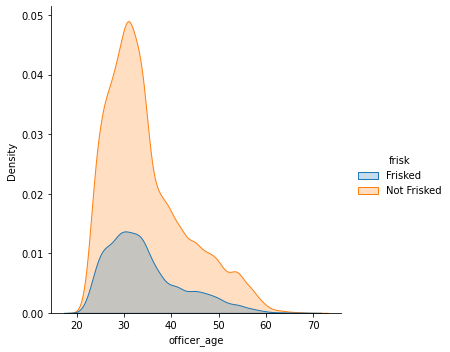

In [4]:
sns.displot(data=df, x='officer_age', hue='frisk', kind='kde', fill=True);

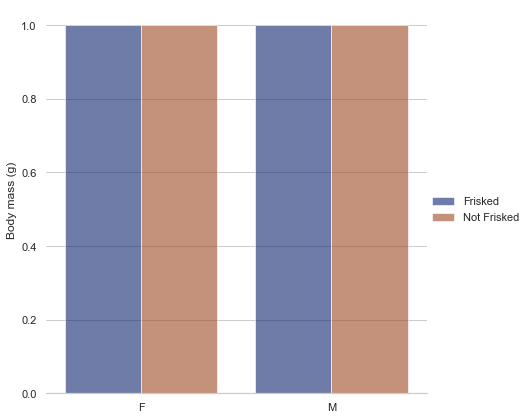

In [5]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="officer_gender", y="count", hue="frisk",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")